In [19]:
import matplotlib.pyplot as plt
plt.style.use(['classic'])
import astropy.coordinates as coord
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from astropy.io import fits
from scipy import stats
from scipy.stats import binned_statistic
from scipy.linalg import block_diag,eigh
plt.rcParams['font.family']='stixgeneral'
plt.rcParams.update({'font.size':5})
from astropy.io import fits
import ebf
import pdb
from mpl_toolkits.mplot3d import Axes3D
from astropy.coordinates import (CartesianRepresentation,CartesianDifferential)
from astropy.coordinates import Galactic
from astropy import units as u1
from astropy.coordinates import SkyCoord
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.stats import chisquare
from itertools import groupby
import scipy.integrate as integrate
import scipy.special as special
from scipy.stats import poisson
from scipy.optimize import minimize
from random import choices
import scipy.stats as st
from astropy.stats import jackknife_resampling
from astropy.stats import jackknife_stats
from scipy.integrate import simps
import scipy
scipy.__version__
from autograd import grad,hessian,jacobian
import numpy.linalg as lin
import autograd.numpy as np
plt.style.use(['classic'])




In [25]:
satidflag = np.loadtxt('halo12_bound.txt')

def make_csv(data_name, deg, num, particle):  # string, float (rotation angle in degrees)


    rot = deg * np.pi / 180.  # angle in radians

    data = ebf.read(data_name + '.ebf')  # reads in ebf file for galaxia output
    df = pd.DataFrame()  # creates empty pandas DataFrame

    keys = data.keys()  # creates list of keys for the ebf file

    if particle == True:
        cut = (data['grav'] < 2.5)
    if particle == False:
        cut = ()
    flag = np.unique(data['satid'])[np.where(satidflag == 0)]
    # print (keys)
    # for ii in range(1,len(list(data.keys()))): #for each list in the ebf file, create a dataframe column with that key as a column name
    # s=pd.Series(data[name])
    # print (s)

    # df[list(data.keys())[ii]]=data[list(data.keys())[ii]]
    # print (s)

    index = range(0, len(data['smass'][cut][np.isin(data['satid'][cut], flag)]), 1)
    #indexi = np.random.choice(index, num, replace=False)

    
   
    
    df['smass'] = data['smass'][cut][np.isin(data['satid'][cut], flag)]

    df['age'] = data['age'][cut][np.isin(data['satid'][cut], flag)]
    df['rad'] = data['rad'][cut][np.isin(data['satid'][cut], flag)]

    df['mag0'] = data['mag0'][cut][np.isin(data['satid'][cut], flag)]
    df['mag1'] = data['mag1'][cut][np.isin(data['satid'][cut], flag)]
    df['mag2'] = data['mag2'][cut][np.isin(data['satid'][cut], flag)]
    df['popid'] = data['popid'][cut][np.isin(data['satid'][cut], flag)]
    df['satid'] = data['satid'][cut][np.isin(data['satid'][cut], flag)]
    # df['fieldid']=data['fieldid']
    # df['partid']=data['partid']
    # df['center']=data['center']
    df['lum'] = data['lum'][cut][np.isin(data['satid'][cut], flag)]
    df['teff'] = data['teff'][cut][np.isin(data['satid'][cut], flag)]
    df['grav'] = data['grav'][cut][np.isin(data['satid'][cut], flag)]

    # set original output positions and velocities as xx_0. These are in the unrotated frame where x-axis does not always point to galactic center
    df['glon_0'] = data['glon'][cut][np.isin(data['satid'][cut], flag)]
    df['glat_0'] = data['glat'][cut][np.isin(data['satid'][cut], flag)]
    df['px_0'] = data['px'][cut][np.isin(data['satid'][cut], flag)]
    df['py_0'] = data['py'][cut][np.isin(data['satid'][cut], flag)]
    df['pz_0'] = data['pz'][cut][np.isin(data['satid'][cut], flag)]
    df['vx_0'] = data['vx'][cut][np.isin(data['satid'][cut], flag)]
    df['vy_0'] = data['vy'][cut][np.isin(data['satid'][cut], flag)]
    df['vz_0'] = data['vz'][cut][np.isin(data['satid'][cut], flag)]

    # print (df['glon_0'],df['glon'])

    # set outputs by rotating so x-axis points to galactic center
    df['glon'] = (df['glon_0'] - deg) % 360
    df['glat'] = df['glat_0']
    df['px'] = df['px_0'] * np.cos(rot) + df['py_0'] * np.sin(rot)
    df['py'] = -df['px_0'] * np.sin(rot) + df['py_0'] * np.cos(rot)
    df['pz'] = df['pz_0']
    df['vx'] = df['vx_0'] * np.cos(rot) + df['vy_0'] * np.sin(rot)
    df['vy'] = -df['vx_0'] * np.sin(rot) + df['vy_0'] * np.cos(rot)
    df['vz'] = df['vz_0']

    # set original center values
    o_cen = np.full(len(df['glon']), np.nan)

    o_cen[0:6] = [-8.0, 0.0, 0.015, 11.1, 239.08, 7.25]
    df['orig_center'] = o_cen

   # df.to_csv(data_name + 'boundnew.csv', index=False)  # save as CSV with same base name that can be opened in python 3
    return df


In [26]:
testd = make_csv('/Users/Jenny/thesis_idea_test/ebf/halo12', 0,60000,False)






In [27]:
testd

,smass,age,rad,mag0,mag1,mag2,popid,satid,lum,teff,...,vz_0,glon,glat,px,py,pz,vx,vy,vz,orig_center
0,0.863666,10.039589,188.269638,23.252941,23.913786,23.252941,10,748,1.237272,3.725627,...,-4.483391,256.710510,5.883332,-43.049690,-182.262878,19.298225,-3.138940,-194.606964,-4.483391,-8.000
1,0.827076,10.031586,155.470871,25.058865,25.419760,25.058865,10,748,0.307959,3.821268,...,-2.647459,257.574768,7.962069,-33.129398,-150.365753,21.535427,15.208607,-158.858902,-2.647459,0.000
2,0.861464,9.894911,154.441757,25.222408,25.586081,25.222408,10,748,0.234930,3.822627,...,-4.610437,256.762878,7.715141,-35.044102,-148.977478,20.733498,4.286467,-157.793823,-4.610437,0.015
3,0.778466,10.112042,154.430862,25.077124,25.432869,25.077124,10,748,0.301651,3.820685,...,-7.142139,257.145355,7.981019,-34.024670,-149.102158,21.441950,5.089456,-158.757141,-7.142139,11.100
4,0.662610,9.694081,72.743561,25.781738,26.504520,25.781738,10,748,-0.606814,3.726568,...,-25.936716,259.467529,8.948499,-13.135101,-70.647469,11.315009,43.589157,-27.700300,-25.936716,239.080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5340657,0.161255,10.113518,7.969152,25.614649,26.916885,25.614649,10,844,-2.208414,3.599257,...,-82.542953,359.152985,0.059964,7.968277,-0.117805,0.008340,118.418617,-308.345032,-82.542953,NaN
5340658,0.161138,10.113453,8.121061,25.657885,26.960472,25.657885,10,844,-2.209144,3.599202,...,23.166183,359.918427,-0.376636,8.120877,-0.011562,-0.053384,-90.488503,-362.383789,23.166183,NaN
5340659,0.539559,10.113625,7.895863,21.909674,22.746347,21.909674,10,844,-0.939652,3.691356,...,50.636719,1.391981,0.421921,7.893318,0.191803,0.058144,90.389053,-240.334213,50.636719,NaN
5340660,0.243930,10.113600,7.952549,24.342245,25.471136,24.342245,10,844,-1.783701,3.628858,...,-77.988594,359.498932,0.473667,7.951973,-0.069545,0.065743,27.052851,-300.052612,-77.988594,NaN


In [28]:
def get_coord_obj_rot(data): #pandas DataFrame
    import astropy
    import astropy.coordinates as coord
    import astropy.units as u
    import numpy as np
    x=data['px'].values#full sets in heliocentric coords
    y=data['py'].values
    z=data['pz'].values
    vx=data['vx'].values
    vy=data['vy'].values
    vz=data['vz'].values
    
    v_sun_gc=[data['orig_center'][3], data['orig_center'][4], data['orig_center'][5]] #galactocentric sun coordinates, based on original heliocentric x-axis aligned with galactocentric X-axis

    gal=coord.SkyCoord(u=x*u.kpc, v=y*u.kpc, w=z*u.kpc, #galactic frame cartesian coordinate object
                       U=vx*u.km/u.s, V=vy*u.km/u.s, W=vz*u.km/u.s, frame='galactic', 
                       representation_type='cartesian', differential_type='cartesian')
    gal.representation_type='spherical' #change type to spherical (l, b, proper motions, rad vel, etc)
    gal.differential_type=coord.representation.SphericalCosLatDifferential

    return gal #return coordinate object

#TURNS A DATAFRAME OF STARS INTO ASTROPY COORDINATE OBJECT, GALACTIC FRAME (HELIOCENTRIC X-AXIS TO GC), TAKING INTO ACCOUNT THE SOLAR REFLEX MOTION
def get_coord_obj_rot_gsr(data):
    import astropy
    import astropy.coordinates as coord
    import astropy.units as u
    import numpy as np
    x=data['px'].values#full sets in heliocentric coords
    y=data['py'].values
    z=data['pz'].values
    vx=data['vx'].values
    vy=data['vy'].values
    vz=data['vz'].values
    # v_sun_gl=[data['center'][3], data['center'][4], data['center'][5]]
    v_sun_gc=[11.1, 239.08, 7.25] #galactocentric sun coordinates
    v_sun=coord.CartesianDifferential(v_sun_gc*u.km/u.s) #turn into a coordinate cartesian differential
    
   
    gal=coord.SkyCoord(u=x*u.kpc, v=y*u.kpc, w=z*u.kpc,
                       U=(vx+v_sun_gc[0])*u.km/u.s, V=(vy+v_sun_gc[1])*u.km/u.s, W=(vz+v_sun_gc[0])*u.km/u.s, frame='galactic',
                       representation_type='cartesian', differential_type='cartesian') #adds solar velocity to star velocity for calculating gsr frame parameters
    
    gal.representation_type='spherical' #convert to spherical representation (l, b, distance)
    
    gal.differential_type=coord.representation.SphericalCosLatDifferential #convert differentials to spherical cos lat (proper motions, radial velocity)
    print (gal)
    return gal

#takes an angle and returns corresponding angle within limits. If no minparam give, returns angle between (0,2*pi)/(0,360)
#if minval is given returns angle between (minval, minval+2*pi)/(minval, minval+360). Ex if minval=-pi, range will be (-pi, pi)
def limrange(angle, *minparam, **degflag):    #float, float, bool (deg=True/False)
    import numpy as np
    if len(minparam) == 0: minval = 0.0
    else: minval = minparam[0]
    
    if ('deg' in degflag):
        newangle = (angle-minval)%(360.0)+minval
    else:   
        newangle = (angle-minval)%(2.0*np.pi)+minval
        
    return newangle

#add radial velocity, l, b, dist, proper motions, v_gsr, pm_gsr, v_t, v_t_gsr, dist modulus to CSV
def rv_csv(halo, field, deg): #string, string, int
    import pandas as pd
    import numpy as np
    #NAME OF CSV FILE
    if deg%1==0: #if deg is integer use make string
        d=str(int(deg))
    else:
        d="{0:.2f}".format(deg) #else round to 2 decimals and make string
    data_name=halo+'/'+d+'/'+field+'/'+halo+'_'+field+'_'+d
    #OPEN CSV
    data=pd.read_csv(data_name+'.csv')
    #GALACTOCENTRIC SOLAR VELOCITY WITH SUN ON X-AXIS
    v_sun_gc=[11.1, 239.08, 7.25]
    #CREATE ASTROPY COORD OBJECT
    gal=get_coord_obj_rot(data)
    gal_gsr=get_coord_obj_rot_gsr(data)
    #ASSIGN TO DATAFRAME
    data=data.assign(l_coord=gal.l.degree)
    data=data.assign(b_coord=gal.b.degree)
    data=data.assign(pm_l_cosb=gal.pm_l_cosb)
    data=data.assign(pm_b=gal.pm_b)
    data=data.assign(pm_mag=np.sqrt(np.add(np.square(data.pm_b),np.square(data.pm_l_cosb))))
    data=data.assign(r_v=gal.radial_velocity)
    data=data.assign(dist=gal.distance)
    data=data.assign(dm=5.*np.log10(gal.distance.value*1000.)-5.)
    data=data.assign(v_l=4.74047*gal.pm_l_cosb*gal.distance)
    data=data.assign(v_b=4.74047*gal.pm_b*gal.distance)
    data=data.assign(v_t=np.sqrt(np.add(np.square(data.v_l),np.square(data.v_b))))
    data=data.assign(pm_l_cosb_gsr=gal_gsr.pm_l_cosb)
    data=data.assign(pm_b_gsr=gal_gsr.pm_b)
    data=data.assign(pm_mag_gsr=np.sqrt(np.add(np.square(data.pm_b_gsr),np.square(data.pm_l_cosb_gsr))))
    data=data.assign(v_gsr=gal_gsr.radial_velocity)
    data=data.assign(v_l_gsr=4.74047*gal_gsr.pm_l_cosb*gal_gsr.distance)
    data=data.assign(v_b_gsr=4.74047*gal_gsr.pm_b*gal_gsr.distance)
    data=data.assign(v_t_gsr=np.sqrt(np.add(np.square(data.v_l_gsr),np.square(data.v_b_gsr))))
    #SAVE NEW CSV WITH SAME NAME TO REPLACE
    data.to_csv(data_name+'.csv', index=False)
    



In [29]:
rad_t = get_coord_obj_rot_gsr(testd)




<SkyCoord (Galactic): (l, b, distance) in (deg, deg, kpc)
    [(256.71054827,  5.88332982, 188.2696316 ),
     (257.57479803,  7.96206604, 155.47086988),
     (256.76291387,  7.71513792, 154.44175584), ...,
     (  1.39198006,  0.42192073,   7.89586227),
     (359.49892233,  0.47366644,   7.95254882),
     (  0.70427571, -0.08290287,   8.00846784)]
 (pm_l_cosb, pm_b, radial_velocity) in (mas / yr, mas / yr, km / s)
    [(-0.00277334,  0.01255581,  -44.19627219),
     ( 0.0114404 ,  0.02714624,  -82.02221457),
     (-0.00496544,  0.02393899,  -81.03030895), ...,
     (-0.09936495,  1.62938747,  101.88050545),
     (-1.60844866, -1.7827112 ,   38.13033191),
     (-0.56572942, -1.94786654, -111.83396059)]>


In [30]:
gctest = get_coord_obj_rot(testd)




In [31]:
rad_t



<SkyCoord (Galactic): (l, b, distance) in (deg, deg, kpc)
    [(256.71054827,  5.88332982, 188.2696316 ),
     (257.57479803,  7.96206604, 155.47086988),
     (256.76291387,  7.71513792, 154.44175584), ...,
     (  1.39198006,  0.42192073,   7.89586227),
     (359.49892233,  0.47366644,   7.95254882),
     (  0.70427571, -0.08290287,   8.00846784)]
 (pm_l_cosb, pm_b, radial_velocity) in (mas / yr, mas / yr, km / s)
    [(-0.00277334,  0.01255581,  -44.19627219),
     ( 0.0114404 ,  0.02714624,  -82.02221457),
     (-0.00496544,  0.02393899,  -81.03030895), ...,
     (-0.09936495,  1.62938747,  101.88050545),
     (-1.60844866, -1.7827112 ,   38.13033191),
     (-0.56572942, -1.94786654, -111.83396059)]>

In [32]:
### rad_t = get_coord_obj_rot_gsr(testd)
gc1 = rad_t.transform_to(coord.Galactocentric)
r2= np.sqrt(gc1.x**2+gc1.y**2+gc1.z**2)



# Function for calculating the space separation and the velocity difference in each shell



zmin = 20
zmax = 100
zlim = 4.

ra = r2/u1.kpc
r2= ra

vral = rad_t.radial_velocity/u1.km*u1.s
groupidi = range(0,len(testd))


# cutting r and z > 20 & r < 60 kpc stars
df1=pd.DataFrame()
df2=pd.DataFrame()
df3 = pd.DataFrame()
df1['x']=gc1.x[ (zmin < r2 ) & (r2 < zmax ) ]
df1['y']=gc1.y[ (zmin < r2 ) & (r2< zmax ) ]
df1['z']=gc1.z[ (zmin < r2 ) & (r2 < zmax ) ]
df1['Vgal']= vral[ (zmin <r2 ) & (r2 < zmax ) ]
df1['r']= r2[ (zmin < r2) & (r2 < zmax )]
df1['starid']= np.array(groupidi)[ (zmin < r2) & (r2 < zmax )]
df1['index']= np.arange(0,len(df1['r']),1)
#df1['time']= testd['ac_time'][ (zmin < r2 ) & (r2 < zmax ) ].values
#print (df1['index'])
df2['r']=df1['r'][(np.absolute(df1['z']) > zlim)]
df2['x']=df1['x'][(np.absolute(df1['z']) > zlim)]
df2['y']=df1['y'][(np.absolute(df1['z']) > zlim) ]
df2['z']=df1['z'][(np.absolute(df1['z']) > zlim)]
df2['Vgal']= df1['Vgal'][(np.absolute(df1['z']) > zlim)]
df2['starid']= df1['starid'][(np.absolute(df1['z']) > zlim)]
#df2['age']= df1['age'][(np.absolute(df1['z']) > zlim)]
df2['index']= np.arange(0,len(df2['r']),1)
#df2['time']= df1['time'][(np.absolute(df1['z']) > zlim)]

df3 = df2.sort_values(by=['index'])

#df3 = df3.sample(n = 10000)

#df3.to_csv("df3_10000_halo12_grav2.5_t7.csv")





In [33]:
df3

,r,x,y,z,Vgal,starid,index
0,74.638863,-21.228137,-70.647473,11.369288,-217.471711,4,0
1,61.187082,-17.049313,-57.870448,10.207410,-249.180318,6,1
2,43.227066,-12.391129,-40.281447,9.614788,-298.842564,15,2
3,27.159067,-7.329921,-25.394986,6.243546,-358.576955,26,3
4,76.495005,-19.890112,-72.779762,12.608546,-212.711163,41,4
...,...,...,...,...,...,...,...
1413018,27.007240,2.979258,-23.844204,-12.327570,221.055538,5340084,999547
1413019,21.872620,17.696306,11.256161,-6.208953,-54.688968,5340150,999548
1413021,77.459628,-62.717667,-34.016095,30.156153,-50.439860,5340254,999549
1413022,71.049675,-62.715687,-30.113211,14.421975,92.512660,5340458,999550


In [ ]:
def total_selection(data_name, deg, num, particle):
    

In [3]:
data17 = pd.read_csv("df3_10000_halo17_grav2.5_t7.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'df3_10000_halo17_grav2.5_t7.csv'

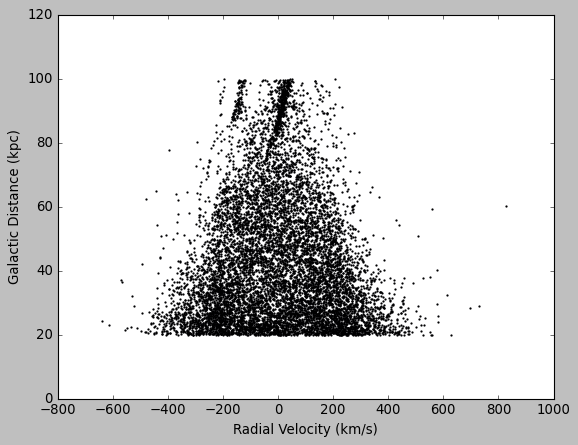

In [25]:
#plotting distance versus vrad (compared to Bullock 2005)

plt.scatter(df3['Vgal'],df3['r'],s=1,c='b')
plt.ylabel('Galactic Distance (kpc)')
plt.xlabel('Radial Velocity (km/s)')
#plt.xlim(-600,600)
#plt.ylim(0,250)
plt.show()


Running a galaxia simulation for halo17 with mag ranging from 14-20 mag, r < 1000 kpc, fsample 0.1, popID10.

In [33]:
t= [10,15,20]
t[::-1]

[20, 15, 10]

# Velocity dispersion

In [12]:
class Comp:
    def __init__(self, x, y, z, rv, groupid):
        '''
        class for the input of the correlation function
        :param x: x position for the target
        :param y: y position for the target
        :param z: z position for the target
        :param rv: radial velocity for the target

        '''

        self.x = np.array(x)
        self.y = np.array(y)
        self.z = np.array(z)
        self.rv = np.array(rv)
        self.groupid = np.array(groupid)


def v_diff(spaces, data, interval, times):
    '''
        :param spaces: Scale for space sparation
        :param data: The orginal dataset
        :param interval: raidal space interval for the shell of calculating the space separation


    '''

    vdiffhf = []
    rlim = []
    num = []
    spectf = []
    indexoutf = []

    zmini = [20, 26, 32, 38, 44, 60, 76]
    zmaxi = [26, 32, 38, 44, 60, 76, 100]
    frac = []
    for ii in range(0, 7, 1):
        
        rlim.append(zmini[ii])
        zmin = zmini[ii]
        zmax = zmaxi[ii]
        dfx = pd.DataFrame()
        dfxf = pd.DataFrame()
        dfx['x'] = data['x'][(zmin < data['r']) & (data['r'] < zmax)]
        # print (dfx['x'])
        dfx['y'] = data['y'][(zmin < data['r']) & (data['r'] < zmax)]
        dfx['z'] = data['z'][(zmin < data['r']) & (data['r'] < zmax)]
        dfx['Vgal'] = data['Vgal'][(zmin < data['r']) & (data['r'] < zmax)]
        dfx['index'] = data['index'][(zmin < data['r']) & (data['r'] < zmax)]
        #time1 = data['time'][(zmin < data['r']) & (data['r'] < zmax)]
        #frac1= len(time1[time1 < 1.0])/len(time1)
        #frac2= len(time1[time1 < 5.0])/len(time1)
        #frac3= len(time1[time1 < 10.0])/len(time1)
       # frac.append([frac1,frac2,frac3])
        dfx['r'] = data['r'][(zmin < data['r']) & (data['r'] < zmax)]
        # zmin=zmax
        indexf = []
        vdiff = []
        spacei = []
        num.append(len(dfx['r']))
        print(len(dfx))
        for kk in range(0, len(dfx), times):
            minn = kk
            maxx = kk + times
            # print (minn,maxx)

            v, i, s = pair_cal(data, dfx[minn:maxx], spaces)
            # print (len(dfx))

            indexf.append(i)
            vdiff.append(v)
            spacei.append(s)
            # print (v)
        # print (vdiff)
        vdiffhf.append(np.concatenate((vdiff)))
        # print (vdiffhf)
        spectf.append(np.concatenate(spacei))
        indexoutf.append(np.concatenate(indexf))

    return rlim, vdiffhf, num, spectf, indexoutf,frac


def pair_cal(dfall, df, spaces):
    dfx2 = df.sort_values(by=['index'])

    indexp = [x for x in dfall.index if x not in dfx2.index]
    indexs = np.append(np.array(dfx2.index), np.array(indexp))

    dfxf = dfall.loc[indexs]

    k = Comp(dfx2['x'], dfx2['y'], dfx2['z'], dfx2['Vgal'], dfx2['index'])
    k2 = Comp(dfxf['x'], dfxf['y'], dfxf['z'], dfxf['Vgal'], dfxf['index'])

    # print (k.rv,k2.rv)


    indexf = []
    vdiff = []
    spacedt = []

    # calculating the velocity difference and space separation for each shell
    for jj in range(0, len(k.rv)):

        # print (k.rv,k2.rv)


        vi = np.repeat(k.rv[jj], len(k2.rv))
        xi = np.repeat(k.x[jj], len(k2.rv))
        yi = np.repeat(k.y[jj], len(k2.rv))
        zi = np.repeat(k.z[jj], len(k2.rv))

        diffv = (vi - k2.rv) ** 2
        diffx = (xi - k2.x) ** 2
        diffy = (yi - k2.y) ** 2
        diffz = (zi - k2.z) ** 2
        indext = []
        for kk in range(0, len(k2.groupid)):
            indext.append(str(k.groupid[jj]) + '-' + str(k2.groupid[kk]))

            # diff = diffv+diffx+diffy+diffz
        spaced = diffx + diffy + diffz

        indexf.append(indext)
        # dia.append(diff)
        vdiff.append(vi - k2.rv)
        spacedt.append(np.sqrt(spaced))
        # diaf = np.array(dia)[np.triu_indices(len(dfx['r']),1)]
    vdiffto = np.array(vdiff)[np.triu_indices(len(k.rv), 1)]
    specdto = np.array(spacedt)[np.triu_indices(len(k.rv), 1)]
    indexfo = np.array(indexf)[np.triu_indices(len(k.rv), 1)]
    # spect.append(specdto)
    # indexout.append(indexfo[specdto < spaces])

    # print (len(vdiffto),len(specdto))

    # vdiffh.append(vdiffto[specdto < spaces])

    # print (len(vdiff))
    return vdiffto[specdto < spaces], indexfo[specdto < spaces], specdto


In [13]:
rlimf = []
test1f = []
numf = []
sepf = []
indexf = []
fract = []
for scale in [12]:
    rlim, test1, num, sep, indexii,frac = v_diff(scale, df3, 10,500)
    rlimf.append(rlim)
    test1f.append(test1)
    numf.append(num)
    sepf.append(sep)
    indexf.append(indexii)
    fract.append(frac)


2833
2121
1496
1126
1536


KeyboardInterrupt: 

In [ ]:
zmini = [20, 26, 32, 38, 44, 60, 76]
zmaxi = [26, 32, 38, 44, 60, 76, 92]

In [ ]:
def one_gaussian(params,x,ydata):
    h1 = params[0]
    c1 = params[1]
    w1 = params[2]
    offset = params[3]
    
    #x,ydata = s6b[num][:100],s6h[num]
    ypred = gaussian(x, h1, c1, w1, offset) 
      
    LL = -np.sum(stats.poisson.logpmf(ydata, ypred))
    #LL = 0
    #for ii in range(0,len(ydata)):
        #print (math.factorial(ydata[ii]))
        #print (np.log(math.factorial(ydata[ii])))
        #print (math.factorial(ydata[ii]),ypred[ii],np.log(ypred[ii]))
        #LL = LL+np.log(np.asarray(math.factorial(ydata[ii])))+ypred[ii]-ydata[ii]*np.log(ypred[ii])
    return LL 



In [ ]:
def two_gaussians(params,x,ydata):
    h1 = params[0]
    c1 = params[1]
    w1 = params[2]
    h2 = params[3]
    c2 =params[4]
    w2 =params[5]
    offset = params[6]
   
    #x,ydata = s6b[num][:100],s6h[num]
    ypred = (gaussian(x, h1, c1, w1, offset=0) +
        gaussian(x, h2, c2, w2, offset=0)  + 
        offset)
    #LL = -np.sum(stats.norm.logpdf(ydata, loc=ypred, scale=sd) )
    LL = -np.sum(stats.poisson.logpmf(ydata, ypred))
    #LL = 0
    #for ii in range(0,len(ydata)):
        #print (math.factorial(ydata[ii]))
        #print (np.log(math.factorial(ydata[ii])))
        #print (math.factorial(ydata[ii]),ypred[ii],np.log(ypred[ii]))
        #LL = LL+np.log(np.asarray(math.factorial(ydata[ii])))+ypred[ii]-ydata[ii]*np.log(ypred[ii])
    return LL 
        
def gaussian(x, height, center, width, offset):
    return height*np.exp(-(x - center)**2/(2*width**2)) + offset

In [ ]:
def Loz(x,amp,x0,gamma):
    return amp*gamma**2/(gamma**2+(x-x0)**2)
def Lorentz1D_mo2(params,x,ydata):
    
    amplitude=params[0]
    x_0=params[1] 
    fwhm=params[2]
    
   
    offset = params[3]
   
    ypred = (Loz(x,amplitude,x_0,fwhm) +
        offset)
    #LL = -np.sum(stats.norm.logpdf(ydata, loc=ypred, scale=sd) )
    LL = -np.sum(stats.poisson.logpmf(ydata, ypred))
    #LL = 0
    #for ii in range(0,len(ydata)):
        #print (math.factorial(ydata[ii]))
        #print (np.log(math.factorial(ydata[ii])))
        #print (math.factorial(ydata[ii]),ypred[ii],np.log(ypred[ii]))
        #LL = LL+np.log(np.asarray(math.factorial(ydata[ii])))+ypred[ii]-ydata[ii]*np.log(ypred[ii])
    return LL 

def Lorentz1D_mo(params,xdata,ydata):
    
    
    
    amplitude=params[0]
    x_0=params[1] 
    fwhm=params[2]
    
    h2 = params[3]
    c2 =params[4]
    w2 =params[5]
    offset = params[6]
   
    ypred = (Loz(xdata,amplitude,x_0,fwhm) +
        gaussian(xdata, h2, c2, w2, offset=0)  + 
        offset)
    #LL = -np.sum(stats.norm.logpdf(ydata, loc=ypred, scale=sd) )
    LL = -np.sum(stats.poisson.logpmf(ydata, ypred))
    #LL = 0
    #for ii in range(0,len(ydata)):
        #print (math.factorial(ydata[ii]))
        #print (np.log(math.factorial(ydata[ii])))
        #print (math.factorial(ydata[ii]),ypred[ii],np.log(ypred[ii]))
        #LL = LL+np.log(np.asarray(math.factorial(ydata[ii])))+ypred[ii]-ydata[ii]*np.log(ypred[ii])
    return LL 


def Lorentz1D_mo_ra(x,amplitude,x_0,fwhm,h2, c2, w2, offset):
    
    #amplitude=params[0]
    #x_0=params[1] 
    #fwhm=params[2]
    
    #h2 = params[3]
    #c2 =params[4]
    ##offset = params[6]
   
    
    #for ii in range(0,len(ydata)):
        #print (math.factorial(ydata[ii]))
        #print (np.log(math.factorial(ydata[ii])))
        #print (math.factorial(ydata[ii]),ypred[ii],np.log(ypred[ii]))
        #LL = LL+np.log(np.asarray(math.factorial(ydata[ii])))+ypred[ii]-ydata[ii]*np.log(ypred[ii])
    return (Loz(x,amplitude,x_0,fwhm) +
        gaussian(x, h2, c2, w2, offset=0)  + 
        offset)



In [ ]:
def Lorentz1D_mo_e(params):
    
    
    
    amplitude=params[0]
    x_0=params[1] 
    fwhm=params[2]
    
    h2 = params[3]
    c2 =params[4]
    w2 =params[5]
    offset = params[6]
   
    ypred = (Loz(xdata,amplitude,x_0,fwhm) +
        gaussian(xdata, h2, c2, w2, offset=0)  + 
        offset)
    #LL = -np.sum(stats.norm.logpdf(ydata, loc=ypred, scale=sd) )
    LL = -np.sum(stats.poisson.logpmf(ydata, ypred))
    #LL = 0
    #for ii in range(0,len(ydata)):
        #print (math.factorial(ydata[ii]))
        #print (np.log(math.factorial(ydata[ii])))
        #print (math.factorial(ydata[ii]),ypred[ii],np.log(ypred[ii]))
        #LL = LL+np.log(np.asarray(math.factorial(ydata[ii])))+ypred[ii]-ydata[ii]*np.log(ypred[ii])
    return LL 



def gaussian_mo2_e(params):
    
    amplitude=params[0]
    x_0=params[1] 
    fwhm=params[2]
    
   
    offset = params[3]
   
    ypred = gaussian(xdata, amplitude, x_0, fwhm, offset) 
    #LL = -np.sum(stats.norm.logpdf(ydata, loc=ypred, scale=sd) )
    LL = -np.sum(stats.poisson.logpmf(ydata, ypred))
    #LL = 0
    #for ii in range(0,len(ydata)):
        #print (math.factorial(ydata[ii]))
        #print (np.log(math.factorial(ydata[ii])))
        #print (math.factorial(ydata[ii]),ypred[ii],np.log(ypred[ii]))
        #LL = LL+np.log(np.asarray(math.factorial(ydata[ii])))+ypred[ii]-ydata[ii]*np.log(ypred[ii])
    return LL 

def two_gaussians_mo_e(params):
    
    h1 = params[0]
    c1 = params[1]
    w1 = params[2]
    h2 = params[3]
    c2 =params[4]
    w2 =params[5]
    offset = params[6]
    
    #x,ydata = s6b[num][:100],s6h[num]
    ypred = (gaussian(xdata, h1, c1, w1, offset=0) +
        gaussian(xdata, h2, c2, w2, offset=0)  + 
        offset)
    #LL = -np.sum(stats.norm.logpdf(ydata, loc=ypred, scale=sd) )
    LL = -np.sum(stats.poisson.logpmf(ydata, ypred))
    #LL = 0
    #for ii in range(0,len(ydata)):
        #print (math.factorial(ydata[ii]))
        #print (np.log(math.factorial(ydata[ii])))
        #print (math.factorial(ydata[ii]),ypred[ii],np.log(ypred[ii]))
        #LL = LL+np.log(np.asarray(math.factorial(ydata[ii])))+ypred[ii]-ydata[ii]*np.log(ypred[ii])
    return LL 
    #for ii in range(0,len(ydata)):
        #print (math.factorial(ydata[ii]))
        #print (np.log(math.factorial(ydata[ii])))
        #print (math.factorial(ydata[ii]),ypred[ii],np.log(ypred[ii]))
        #LL = LL+np.log(np.asarray(math.factorial(ydata[ii])))+ypred[ii]-ydata[ii]*np.log(ypred[ii])
 



In [ ]:
def two_gaussians_ra(x, h1, c1, w1, h2, c2, w2, offset):
    return (gaussian(x, h1, c1, w1, offset=0) +
        gaussian(x, h2, c2, w2, offset=0)  + 
        offset)

In [ ]:
def Loz(x,amp,x0,gamma):
    return amp*gamma**2/(gamma**2+(x-x0)**2)

In [ ]:
def Lorentz1D_mo_new(params,x,ydata,test,k):
    params[k]=test
    

    ypred = (Loz(x,params[0],params[1],params[2]) +
        gaussian(x, params[3], params[4], params[5], offset=0)  + 
        params[6])
    #LL = -np.sum(stats.norm.logpdf(ydata, loc=ypred, scale=sd) )
    LL = -np.sum(stats.poisson.logpmf(ydata, ypred))
    #LL = 0
    #for ii in range(0,len(ydata)):
        #print (math.factorial(ydata[ii]))
        #print (np.log(math.factorial(ydata[ii])))
        #print (math.factorial(ydata[ii]),ypred[ii],np.log(ypred[ii]))
        #LL = LL+np.log(np.asarray(math.factorial(ydata[ii])))+ypred[ii]-ydata[ii]*np.log(ypred[ii])
    return LL 





def error(params,params2,x,ydata,guess6):
    LL1=Lorentz1D_mo(params,x,ydata)
    LL2=one_gaussian(params2,x,ydata)
    aic1 = 2*LL1+14
    aic2 = 2*LL2+8
    para1=[]
    para2f = []
    aicf1=[]
    aicf2=[]
    
    for ii in range(0,len(params)):
        #ii=0
        
        para= params[ii]
   
        
        #param[ii]=par
       # LL1i=Lorentz1D_mo(params,x,ydata)
       
       # aic1i = 2*LL1i+14
        #print (np.absolute(LL1-LL1i))
        #for kk in range(0,100):
            
            
        LL1i=Lorentz1D_mo(params,x,ydata)
            
            
           
   
        
        bds1=[(0, 9999), (-1000,1000), (0,50), (0,9999), (-1000,1000),(-50,9999),(-9999,9999)]
        #bds1[ii]=(para-0.001, para+0.001)
        #bds1[ii]=(0, 99)
        resu = minimize(Lorentz1D_mo_new, guess6,args=(x,ydata,para,ii),method = 'Nelder-Mead',bounds=bds1)
        p1 = resu.x
            
        ypred = (Loz(x, p1[0], p1[1], p1[2]) +
        gaussian(x, p1[3], p1[4], p1[5], offset=0)  + 
        p1[6])
        LL1  = -np.sum(stats.poisson.logpmf(ydata, ypred))
        print ('3',LL1i,LL1)
        while (np.absolute(np.absolute(LL1-LL1i)-0.50) > 0.1):
            paraini=para
            if np.absolute(para) < 1.5*np.absolute(paraini):
                para=para+0.1*para
                
            elif (np.absolute(para) > 1.5*np.absolute(paraini)) & (np.absolute(para) < 2.0*np.absolute(paraini)):
                para= paraini
                para=para+0.05*para
            elif np.absolute(para) > 100*np.absolute(paraini):
                break
            else:
                para= paraini
                para=para+0.01*para
            LL1i=Lorentz1D_mo(params,x,ydata)
            
            
           
   
            #parameters:
            #amplitude, center, width of the inner function(gaussian or lorentz), amplitude,center,width of the outer function(gaussian)
             #offset
            #3.72083732e+03  4.25447029e+00  1.39629408e+00  9.99683439e+02
 #-3.47424188e+00  2.37711136e+02 -6.95352375e+00
            #bds1=[(para-0.01, para+0.01), (-1000,1000), (0,300), (0,9999), (-1000,1000),(-50,9999),(-99,99)]
            #bds1[ii]=(para-0.01, para+0.01)
            
            #resu = minimize(Lorentz1D_mo, guess6,args=(x,ydata),method = 'Nelder-Mead',bounds=bds1)
            bds1=[(0, 99), (-1000,1000), (0,50), (0,9999), (-1000,1000),(-50,9999),(-9999,9999)]
        #bds1[ii]=(para-0.001, para+0.001)
        #bds1[ii]=(0, 99)
            resu = minimize(Lorentz1D_mo_new, guess6,args=(x,ydata,para,ii),method = 'Nelder-Mead',bounds=bds1)
            p1 = resu.x
            
            ypred = (Loz(x, p1[0], p1[1], p1[2]) +
        gaussian(x, p1[3], p1[4], p1[5], offset=0)  + 
        p1[6])
            LL1  = -np.sum(stats.poisson.logpmf(ydata, ypred))
            #if (np.absolute(np.absolute(LL1-LL1i)-0.50) < 0.1):
                
                #LL1i=Lorentz1D_mo(params,x,ydata)
        aic1i = 2*LL1+14
                
        para1.append(para)
        aicf1.append(aic1i)
        print ("2",para,LL1i,LL1,aic1i)
                
                #break
                
            #else:  
                
                #print (p1,LL1i,LL1)
                #params[ii]=para
                #LL1i=Lorentz1D_mo(params,x,ydata)
                
            
            
            #print (LL1,LL1i,para)
        #para1.append(para)
        #aicf1.append(aic1i)
   
    #print (para1,para2,aicf1,aicf2)
    return para1,aicf1,aicf2
        
            
    

In [ ]:
def fitting_result(x,y,amplitude, x_0, fwhm,h2,c2,w2,offset,bins,k,plot):

   

    guess6= [amplitude, x_0, fwhm, h2, c2, w2,offset]
   
    global xdata,ydata
    xdata=x
    ydata=y
    #LL = -np.sum(stats.norm.logpdf(ydata, loc=yPred, scale=sd) )
    bds1=((0, 9999), (-100,100), (0,100), (0,9999), (-100,100),(-50,9999),(-99,99))
    optim = minimize(two_gaussians_mo_e, guess6,method = 'SLSQP',bounds=bds1, options={'maxiter':20000,'disp':True})
    optim2f = minimize(gaussian_mo2_e, [h2,c2,w2,offset],method = 'SLSQP', options={'maxiter':20000,'disp':True})
   
    #np.sum(((y-two_gaussians(x, *optim1))**2)/(poisson.std(50,loc=0)**2))/(bins-len(guess6))
    
    #chisq1 = chisquare(y,two_gaussians(x, *optim1))[0]
    #print (optim1.x)
    p1 = optim.x
    optim1=p1
    ypred = two_gaussians_ra(xdata,*p1)
    LL1  = -np.sum(stats.poisson.logpmf(y, ypred))
    
    hessian_ = hessian(two_gaussians_mo_e)
    
    hess1 = hessian_(optim.x)
    #print (error,error2)
   # print ('chisquare',chisquare(y, f_exp=ypred))
    print (optim)
    print ('chi square',np.sum((np.array(y)-np.array(ypred))**2/ypred))
    #chisq1 =  
    #print ('err',np.sqrt(np.diag(success1)))
    
    
    #np.sum(np.absolute((two_gaussians(x, *optim1) - y)**2/two_gaussians(x, *optim1)))
    #chisq2 = np.sum(((y-one_gaussian(x, *optim2))**2)/(poisson.std(1/2*np.max(y),loc=0)**2))/(bins-len(guess6))
    p2 = optim2f.x
    #print (optim2.x)
    ypred2 = gaussian(x, p2[0], p2[1], p2[2],p2[3])
    
    LL2  = -np.sum(stats.poisson.logpmf(y, ypred2))
    optim2 =p2
    hessian_ = hessian(gaussian_mo2_e)
    
    hess2 = hessian_(optim2f.x)
    #atio = np.exp(7-4)*np.exp(LL1/LL2)
    aic1 = 2*LL1+14
    aic2 = 2*LL2+8
    bic1 = -2*np.log(LL1)+7*np.log(bins)
    bic2 = -2*np.log(LL2)+4*np.log(bins)
    #print (aic1,LL1)
    print ('chi square 2',np.sum((np.array(y)-np.array(ypred2))**2/ypred2))
    #para1,aicf1,aicf2=error(optim1,optim2,x,y,guess6)
    #interen = integrate.quad(lambda x: gaussian(x,optim1[0],optim1[1],optim1[2],optim1[6]), -np.absolute((optim1[2]*3))+optim1[1],np.absolute(optim1[2]*3)+optim1[1])[0]
    #intereb = integrate.quad(lambda x: two_gaussians_ra(x, *optim1[:7]), -np.absolute((optim1[5]*3))+optim1[4], -np.absolute((optim1[2]*3))+optim1[1])[0]
    ##ratio = interen/(intereb)
    print (optim2)
    #if (p1[0] > 0) & (p1[2] > 0) & (p2[0] > 0):
        #print ('two gaussian')
    #else:
        #print ('one gaussian')
    #print (str(k)+'&'+str(np.round(aic1,2))+'&'+str(np.round(aic2,2))+'&'+str(np.round(bic1,2))+'&'+str(np.round(bic2,2))+'\\')
    #print ('err',np.sqrt(np.diag(success2)))
    if plot == True:
        plt.scatter(x,y, c='pink', label='measurement', marker='.', edgecolors=None)
        plt.plot(x, ypred, c='b', label='fit of Two Gaussians')
        plt.title("Two Gaussian Fitting")
        plt.ylabel("Number of pairs")
        plt.xlabel("Velocity Difference")
        plt.legend(loc='upper left')
        plt.savefig('./halo02_results/halo02_2_2fit'+str(k)+'12grav2.5largebin.png')
        plt.show()
        plt.scatter(x,y, c='pink', label='measurement', marker='.', edgecolors=None)
        plt.plot(x, (gaussian(x, p2[0], p2[1], p2[2], p2[3])), c='b', label='fit of 1 Gaussians')
        plt.title("One gaussian fitting")
        plt.xlabel("Velocity Difference")
        plt.legend(loc='upper left')
        plt.savefig('./halo02_results/halo02_2_1fit'+str(k)+'12grav2.5largebin.png')
        plt.show()
    
    #return 
    #np.sum(np.absolute((one_gaussian(x, *optim2) - y)**2/one_gaussian(x, *optim2)))
    #if np.absolute(aic1)-np.absolute(aic2) < 0:
        #return LL1,p1
    #else:
        #return LL2,p2
         
    #if np.absolute(chisq1) < np.absolute(chisq2):
        
        interen = integrate.quad(lambda x:  two_gaussians_ra(x, *optim1), -np.absolute((optim1[2]*3))+optim1[1],np.absolute(optim1[2]*3)+optim1[1])[0]
        intereb = simps(y, dx=np.absolute(x[0]-x[1]))
        
        ratio = interen/(intereb)
        
        #print ('test',interen,intereb,-o
        #print ('test',interen,intereb,-optim1[2]*3+optim1[1], optim1[2]*3+optim1[1],-optim1[5]*3+optim1[4], -optim1[2]*3+optim1[1],ratio)
    
        #return optim1,chisq1,success1,ratio
    #else:
        #print (chisq2)
    return optim1,optim2,aic1,aic2,ratio,hess1,hess2



In [ ]:
def fitting_final(data,ap1,c1, width1, ap2, c2, width2,offset,bins,plot):
    optim = []
    integrer = []
    optim1f = []
    optim2f = []
    hess = []
    hess2= []
    aic1f = []
    aic2f = []
    fn = open("./halo02_results/halo02_2_file2_12kpclztest0320largebin.txt", "w")
    fn2 =  open("./halo02_results/halo02_2_file1_12kpclztest0320largebin.txt", "w")
    for ii in range(0,6):
        datat = data[ii][( data[ii]< 1000)  & (data[ii] > -1000)]
        y16 = np.percentile(datat, 0.3, axis=0)
        y84 = np.percentile(datat, 99.7, axis=0)
        datay, datax = np.histogram(data[ii][( data[ii]< y84+y84*0.2)  & (data[ii] > y16+y16*0.2)], density=False,bins=bins)
        optim1,optim2,aic1,aic2,ratio,hessian1,hessian2 = fitting_result(datax[:bins],datay,ap1,c1, width1, ap2,c2, width2,offset,bins,ii,plot)
        #optim.append(np.append(result,chisq))  
        error=np.diag(np.sqrt(np.linalg.inv(hessian1)))
        error2= np.diag(np.sqrt(np.linalg.inv(hessian2)))
        print ('err',error,error2)
        #mcmc for aic
        aic16,aic84,aic216,aic284= mc_error(datax[:bins],datay,optim1,optim2,error,error2,10000)
        optim1f.append(optim1)
        optim2f.append(optim2)
        hess.append(hessian1)
        hess2.append(hessian2)
        aic1f.append([aic16,aic84])
        aic2f.append([aic216,aic284])
        #optim1,optim2,aic1,aic2,ratio = fitting_result(data[data.keys()[ii+1]][(data[data.keys()[ii+1]] > -1000) &( data[data.keys()[ii+1]] < 1000)],data[data.keys()[ii]][(data[data.keys()[ii+1]] > -1000) &( data[data.keys()[ii+1]] < 1000)],ap1,c1, width1, ap2,c2, width2,offset,0,bins,ii)
        #optim.append(np.append(result,chisq))
       # print (result)
        #if len(result) > 5:
        fn.write('& ' + str(np.round(aic1,2)) + '& ' +str(np.round(optim1[0],2))+'& '+str(np.round(optim1[1],2))+ '& '+str(np.round(optim1[2],2))+'& '+str(np.round(optim1[3],2)) + '& '
               +str(np.round(optim1[4],2))+'& '+str(np.round(optim1[5],2))+'&  '+str(np.round(ratio,2))+ "\\"+'\n')
        fn2.write('& ' + str(np.round(aic2,2)) + '& ' +str(np.round(optim2[0],2))+'& '+str(np.round(optim2[1],2))+ '& '+str(np.round(optim2[2],2))+ '&  '+str(np.round(ratio,2))
               + "\\"+'\n')
        #print (ratio)
    fn.close()
    fn2.close()
    return optim1f,optim2f,aic1,aic2,ratio,hess,hess2,aic1f,aic2f

In [ ]:

def gnfunctwo(dataarr, params):
    center = params[0]
    sigma = params[1]
    amplitude = params[2]
    c2 = params[3]
    w2 =params[4]
    h2 =params[5]
  
   
    #x,ydata = s6b[num][:100],s6h[num]
    #ypred = (gaussian(x, h1, c1, w1, offset=0) +
        #gaussian(x, h2, c2, w2, offset=0)  + 
       # offset)
    #LL = -np.sum(stats.norm.logpdf(ydata, loc=ypred, scale=sd) )
    #LL = -np.sum(stats.poisson.logpmf(ydata, ypred))
    #LL = 0
    #for ii in range(0,len(ydata)):
        #print (math.factorial(ydata[ii]))
        #print (np.log(math.factorial(ydata[ii])))
        #print (math.factorial
    gnvals = (amplitude/np.sqrt(2*np.pi*sigma*sigma))*np.exp(-(dataarr-center)**2/(2*sigma*sigma))+(h2/np.sqrt(2*np.pi*w2*w2))*np.exp(-(dataarr-c2)**2/(2*w2*w2))
    return gnvals



def gnfuncsin(dataarr, x_0, fwhm,amplitude):
    center = x_0
    sigma = fwhm
    amplitude = amplitude
    #offset = 0
    gnvals = (amplitude/np.sqrt(2*np.pi*sigma*sigma))*np.exp(-(dataarr-center)**2/(2*sigma*sigma))
    return gnvals

def gaussian_mo2_unbin(params,xdata):
    
    amplitude=params[2]
    x_0=params[0] 
    sigma=params[1]
    
    
   # offset = params[3]
    normterm = amplitude*np.sqrt(2*np.pi*sigma*sigma)
    modelvals = gnfuncsin(xdata,*params)
    # minus the likelihood
    mlikelihood = normterm - np.sum(np.log(modelvals))
   
   
    #LL = -np.sum(stats.norm.logpdf(ydata, loc=ypred, scale=sd) )
    #interen =  amplitude*np.sqrt(np.pi*(2*fwhm**2))
    
    #LL = 0
    #for ii in range(0,len(ydata)):
        #print (math.factorial(ydata[ii]))
        #print (np.log(math.factorial(ydata[ii])))
        #print (math.factorial(ydata[ii]),ypred[ii],np.log(ypred[ii]))
        #LL = LL+np.log(np.asarray(math.factorial(ydata[ii])))+ypred[ii]-ydata[ii]*np.log(ypred[ii])
    return mlikelihood 

def two_gnfunc(dataarr, params):
    '''
    function for 
    :param length (float): length of the sequence 
    :return: 
    '''
    
    center = params[0]
    sigma = params[1]
    center2 = params[2]
    sigma2 = params[3]
    Amp1 = params[4]
    
    #print(center, sigma, center2, sigma2, Amp1)
    
    gnvals = Amp1 * np.exp(-(dataarr-center)**2/(2*sigma*sigma))/sigma/np.sqrt(2*np.pi)\
            + (1-Amp1) * np.exp(-(dataarr-center2)**2/(2*sigma2*sigma2))/sigma2/np.sqrt(2*np.pi)
    return gnvals

def twogau_like(params, xvals):
    
    modelvals = two_gnfunc(xvals, params)
   
    mlikelihood = - np.sum(np.log(modelvals)) 
    
    #print(mlikelihood)
    return (mlikelihood)


In [ ]:
def fitting_reunbin(x, x_0, fwhm,c2,w2,h2,k,plot):

   

    guess6= [x_0, fwhm,c2,w2, h2]
   
   # global xdata,ydata
   # xdata=x
    #ydata=y
    #LL = -np.sum(stats.norm.logpdf(ydata, loc=yPred, scale=sd) )
    #print (x)
    bds1=((-100,100),(0,100),(-100,100),(100,1000),(1e-5,1-1e-5))
    optim = minimize(twogau_like, guess6,args=(x),method = 'TNC',bounds=bds1,  options={'maxfun':100000,'disp':True})
    bds2=((-50,50), (0,2000), (0,200))
    optim2f = minimize(gaussian_mo2_unbin, [c2,w2,100],args=(x),bounds=bds2,method = 'TNC', options={'maxiter':20000,'disp':True})
   
    #np.sum(((y-two_gaussians(x, *optim1))**2)/(poisson.std(50,loc=0)**2))/(bins-len(guess6))
    
    #chisq1 = chisquare(y,two_gaussians(x, *optim1))[0]
    #print (optim1.x)
    p1 = optim.x
    optim1=p1
    LL1 = twogau_like(p1,x)
    print (p1)
 #   ypred = two_gaussians_ra(x,*p1)
    #LL1  = -np.sum(np.log(ypred))
    
    #hessian_ = hessian(two_gaussians_mo_e)
    
    #hess1 = hessian_(optim.x)
    #print (error,error2)
   # print ('chisquare',chisquare(y, f_exp=ypred))
    #print (optim)
    #print ('chi square',np.sum((np.array(y)-np.array(ypred))**2/ypred))
    #chisq1 =  
    #print ('err',np.sqrt(np.diag(success1)))
    
    
    #np.sum(np.absolute((two_gaussians(x, *optim1) - y)**2/two_gaussians(x, *optim1)))
    #chisq2 = np.sum(((y-one_gaussian(x, *optim2))**2)/(poisson.std(1/2*np.max(y),loc=0)**2))/(bins-len(guess6))
    p2 = optim2f.x
    print (p2)
   # ypred2 = gaussian(x, p2[0], p2[1], p2[2],p2[3])
    
    LL2  = gaussian_mo2_unbin(p2,x)
    optim2 =p2
    #hessian_ = hessian(gaussian_mo2_e)
    
    #LL2= gaussian_mo2_unbin(x,p2)
    #hess2 = hessian_(optim2f.x)
    #atio = np.exp(7-4)*np.exp(LL1/LL2)
    aic1 = 2*LL1+14
    aic2 = 2*LL2+8
    #bic1 = -2*np.log(LL1)+7*np.log(bins)
    #bic2 = -2*np.log(LL2)+4*np.log(bins)
    #print (aic1,LL1)
    #print ('chi square 2',np.sum((np.array(y)-np.array(ypred2))**2/ypred2))
    #para1,aicf1,aicf2=error(optim1,optim2,x,y,guess6)
    #interen = integrate.quad(lambda x: gaussian(x,optim1[0],optim1[1],optim1[2],optim1[6]), -np.absolute((optim1[2]*3))+optim1[1],np.absolute(optim1[2]*3)+optim1[1])[0]
    #intereb = integrate.quad(lambda x: two_gaussians_ra(x, *optim1[:7]), -np.absolute((optim1[5]*3))+optim1[4], -np.absolute((optim1[2]*3))+optim1[1])[0]
    ##ratio = interen/(intereb)
   
    #if (p1[0] > 0) & (p1[2] > 0) & (p2[0] > 0):
        #print ('two gaussian')
    #else:
        #print ('one gaussian')
    #print (str(k)+'&'+str(np.round(aic1,2))+'&'+str(np.round(aic2,2))+'&'+str(np.round(bic1,2))+'&'+str(np.round(bic2,2))+'\\')
    #print ('err',np.sqrt(np.diag(success2)))
    #if plot == True:
  #  plt.scatter(x,y, c='pink', label='measurement', marker='.', edgecolors=None)
  #  plt.plot(x, ypred, c='b', label='fit of Two Gaussians')
   # plt.title("Two Gaussian Fitting")
   # plt.ylabel("Number of pairs")
   # plt.xlabel("Velocity Difference")
   # plt.legend(loc='upper left')
    #plt.savefig('./halo02_results/halo02_2_2fit'+str(k)+'12grav2.5largebin.png')
    #plt.show()
        #plt.scatter(x,y, c='pink', label='measurement', marker='.', edgecolors=None)
       # plt.plot(x, (gaussian(x, p2[0], p2[1], p2[2], p2[3])), c='b', label='fit of 1 Gaussians')
        #plt.title("One gaussian fitting")
       # plt.xlabel("Velocity Difference")
        #plt.legend(loc='upper left')
        #plt.savefig('./halo02_results/halo02_2_1fit'+str(k)+'12grav2.5largebin.png')
        #plt.show()
    
    #return 
    #np.sum(np.absolute((one_gaussian(x, *optim2) - y)**2/one_gaussian(x, *optim2)))
    #if np.absolute(aic1)-np.absolute(aic2) < 0:
        #return LL1,p1
    #else:
        #return LL2,p2
         
    #if np.absolute(chisq1) < np.absolute(chisq2):
        
        #interen = integrate.quad(lambda x: Lorentz1D_mo_ra(x, *optim1), -np.absolute((optim1[2]/2*3))+optim1[1],np.absolute(optim1[2]/2*3)+optim1[1])[0]
        #intereb = simps(y, dx=np.absolute(x[0]-x[1]))
        
    ratio = 1 
        #interen/(intereb)
        
        #print ('test',interen,intereb,-optim1[2]*3+optim1[1], optim1[2]*3+optim1[1],-optim1[5]*3+optim1[4], -optim1[2]*3+optim1[1],ratio)
    
        #return optim1,chisq1,success1,ratio
    #else:
        #print (chisq2)
    return optim1,optim2,aic1,aic2,ratio



In [ ]:
def fitting_unbin(data,c1, width1, c2, width2,h2,plot):
    optim = []
    integrer = []
    optim1f = []
    optim2f = []
    hess = []
    hess2= []
    aic1f = []
    aic2f = []
    fn = open("./halo02_results/halo02_2_file2_12kpclztestunbin1.txt", "w")
    fn2 =  open("./halo02_results/halo02_2_file1_12kpclztestunbin1.txt", "w")
    for ii in range(0,6):
        datat = data[ii][( data[ii]< 1000)  & (data[ii] > -1000)]
        y16 = np.percentile(datat, 0.3, axis=0)
        y84 = np.percentile(datat, 99.7, axis=0)
        datat2=data[ii][( data[ii]< y84+y84*0.2)  & (data[ii] > y16+y16*0.2)]
        #print (datat2)
        #datay, datax = np.histogram(data[ii][( data[ii]< y84+y84*0.2)  & (data[ii] > y16+y16*0.2)], density=False,bins=bins)
        optim1,optim2,aic1,aic2,ratio = fitting_reunbin(datat2,c1, width1,c2, width2,h2,ii,plot)
        #optim.append(np.append(result,chisq))  
        #error=np.diag(np.sqrt(np.linalg.inv(hessian1)))
        #error2= np.diag(np.sqrt(np.linalg.inv(hessian2)))
       # print ('err',error,error2)
       # #mcmc for aic
        #aic16,aic84,aic216,aic284= mc_error(datax[:bins],datay,optim1,optim2,error,error2,10000)
        optim1f.append(optim1)
        optim2f.append(optim2)
     
    fn.close()
    fn2.close()
    return optim1f,optim2f,aic1,aic2,ratio

In [ ]:
def mc_error(xdata,bestpara,bestpara2,error,error2,num,plot=True):
    para1= []
    aicf=[]
    para2 = []
    aicf2= [] 
    
    for jj in range(0,len(bestpara)):
        para1.append(np.random.normal(bestpara[jj],error[jj],num))
        
    for jj2 in range(0,len(bestpara2)):
        
        para2.append(np.random.normal(bestpara2[jj2],error2[jj2],num))
    para1f = np.array(para1).T
    para2f = np.array(para2).T
    for kk in range(0,len(para1f)):
        aicf.append(2*two_gaussians(para1f[kk],xdata,ydata)+14)
        aicf2.append(2*one_gaussian(para2f[kk],xdata,ydata)+8)
   # #plt.hist(aicf,bins=100,label='Hist of two Gaussian aic with nan',color='k',alpha=0.8)
    #plt.legend(loc='upper right')
    #plt.savefig('./halo02_results/halo02_aic_dist1.png')
   # plt.show()
   # plt.hist(np.array(aicf)[~np.isnan(aicf)],bins=100, alpha=0.8,label='Hist of two Gaussian aic without nan')
    #plt.title("Two Gaussian Fitting")
        #plt.ylabel("Number of pairs")
        #plt.xlabel("Velocity Difference")
   # plt.legend(loc='upper right')
    #plt.savefig('./halo02_results/halo02_aic_dist2.png')
   # plt.show()
    aicy16 = np.percentile(np.array(aicf)[~np.isnan(aicf)], 0.3, axis=0)
    aicy84 = np.percentile(np.array(aicf)[~np.isnan(aicf)], 99.7, axis=0)
    aic2y16 = np.percentile(np.array(aicf2)[~np.isnan(aicf2)], 0.3, axis=0)
    aic2y84 = np.percentile(np.array(aicf2)[~np.isnan(aicf2)], 99.7, axis=0)
 
    return aicy16,aicy84,aic2y16,aic2y84

# the cell below has error

In [ ]:
#running the fitting 
import numdifftools as nd
import autograd.scipy.stats as stats
optim1f,optim2f,aic1f,aic2f,RATIO = fitting_unbin(test1f[0],0, 30,0, 200,0.5,True)

In [ ]:
for ii in range(0,len(test1f[0])):
    np.savetxt('testting_halo10'+str(ii)+'.txt',test1f[0][ii],delimiter=' ', newline='\n')
    

In [ ]:
#the final hessian matrix
#using the function with snr cut will return the fraction of selected sample and the median ratio between dr14 and dr7

   
def reading_data(data,plot=True):
    
 
#data_error3 = np.loadtxt("Lyman_alpha_binning_flux_covariance_z>2.5-4.8_1075-1150_3.2base_dr14_newbin.txt")
    
    #i = range(0, len(data_dr14dr7))
    #data_indi_flux7 = np.split(data_dr14dr7[i,1], len(data_z_r7))
    #data_indi_wave7 = np.split(data_dr14dr7[i,0], len(data_z_r7))
    
    
    if plot == True:
        fig, ax = plt.subplots(3, 2, figsize=(22, 18), gridspec_kw={'wspace': 0.18, 'hspace': 0.23}, sharex=False, sharey=False)

        fig.subplots_adjust(left=0.05, bottom=0.05, right=0.9, top=0.95)
        i = 0
        #fig.text(0.5, 0.003,  r'z',fontsize =15, ha='center')
        #fig.text(0.01, 0.5, r'z', fontsize =15,va='center', rotation='vertical')
        degrees = [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (0, 3)]
        for index in range(ax.shape[0]):
            for jndex in range(ax.shape[1]):
                #ax[index][jndex].axhline(1,alpha = 0.5)
                #ax[index][jndex].axhline(np.median(data_indi_flux[i][(1075 <data_indi_wave[i]) & (data_indi_wave[i] < 1150)][:292]/data_indi_flux7[i][(1075 <data_indi_wave7[i]) & (data_indi_wave7[i] < 1150)][:292]),c = 'r', label =  'median ratio for DR14/DR7 (1075-1150)')
                cr = ax[index][jndex].contourf(np.array(np.linalg.inv(data[i])),cmap="RdBu_r")
                cbar = fig.colorbar(cr, ax=ax[index][jndex])
                
                #cbar.ax.set_title('')
                ax[index][jndex].set_title('covariance plot for shell = '+str(i),fontsize = 15)
                #ax[index][jndex].set_xticks(np.linspace(0,282,5),np.round(data_indi_wave[i]*(1+data_z[i])/1215.67-1,3))
                #ax[index][jndex].set_yticks([0,50,100,150,200,250,281])
                #ax[index][jndex].set_xticks([0,50,100,150,200,250,281])
                #print (np.array(ax[index][jndex].get_xticks())[1])
                #print (np.array([1,2,3,4,5])[np.array(ax[index][jndex].set_xticks())])
                #ax[index][jndex].set_yticklabels(np.round(data_indi_wave[i]*(1+data_z[i])/1215.67-1,3)[np.array(ax[index][jndex].get_yticks(),dtype = int)])
                #ax[index][jndex].set_xticklabels(np.round(data_indi_wave[i]*(1+data_z[i])/1215.67-1,3)[np.array(ax[index][jndex].get_xticks(),dtype = int)])
                cbar.ax.set_title(r'sigma_ij^2', fontsize=13,loc='right')
                ax[index][jndex].set_xlabel('parameters')
                ax[index][jndex].set_ylabel('parameters')
                #ax[index][jndex].plot(np.array(data_indi_wave7[i]),data_indi_flux7[i], label=str('{:.2f}'.format(data_z_r7[i,0]))+' dr7 data')
                #ax[index][jndex].set_xlim(1075,1150)
                #ax[index][jndex].set_ylim(0.5,6.0)
        #ax[index][jndex].plot(np.array(data_indi_wave3[i]),data_indi_flux3[i], label=str('{:.2f}'.format(data_z3[i])) + ' dr12 data')
        #ax[index][jndex].plot(np.array(data_indi_wave4[i]),data_indi_flux4[i], label=str('{:.2f}'.format(data_z4[i])) + ' dr12 corrected data')
        # ax[index][jndex].axvline(rest_wave[i]*3.309,c='k',linestyle = '--',label = str(names[i]))
        # ax[index][jndex].axvline(rest_wave[i]*3.309,c='k',linestyle = '--')
        # ax[index][jndex].annotate('0.25 on axes', (0.25,4530), textcoords='data', size=20)
        #print (np.median(data_indi_flux[i][(1075 <data_indi_wave[i]) & (data_indi_wave[i] < 1150)][:292]/data_indi_flux7[i][(1075 <data_indi_wave7[i]) & (data_indi_wave7[i] < 1150)][:292]))
                #ax[index][jndex].legend()
                #ax[index][jndex].set_xlabel('wavelength')
                #ax[index][jndex].set_ylabel('flux')
        #ax[index][jndex].set_xticklabels('{:.2f}'.format(np.array(data_indi_wave[i]/1215.67*(1+data_z[i]))))


                i = i + 1
      
        plt.savefig('covariance_plot_testing1.pdf')
        plt.show(fig)
        
        
   
        


In [ ]:
#contour plot 1
reading_data(hess,plot=True)

In [ ]:
#contour plot 2
reading_data(hess2,plot=True)


In [ ]:
#inverse of the hessian matrix
print(np.diag(np.linalg.inv(hess[5])))

In [ ]:
print (np.diag(np.sqrt(np.linalg.inv(hess2[5]))))

In [ ]:
print (np.diag(np.sqrt(np.linalg.inv(hess2[6]))))